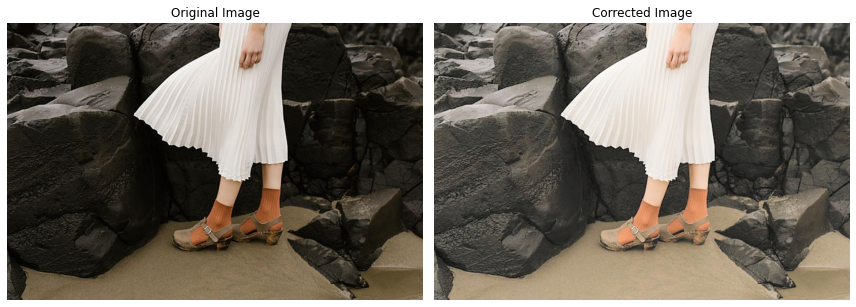

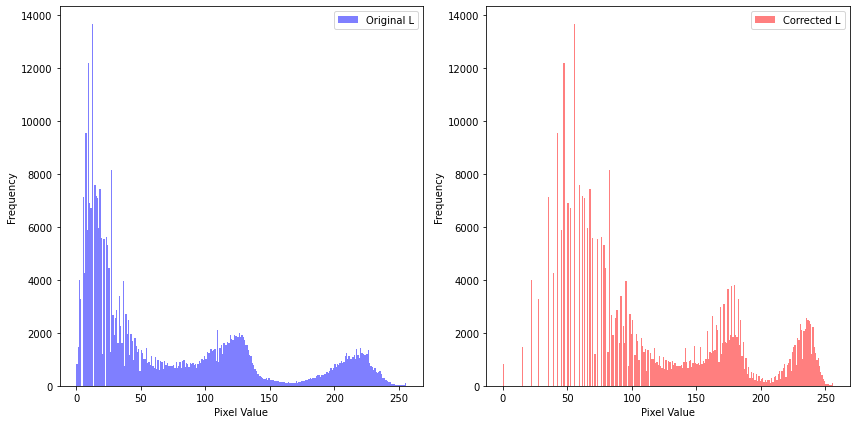

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('highlights_and_shadows.jpg',cv2.IMREAD_COLOR)
gamma = 0.5

#----------------------------------------
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB) # Convert to Lab colour space
L, a, b = cv2.split(lab_image)
L_new = np.power(L / 255.0, gamma) * 255.0 # Gamma correction in the L plane
L_new = np.clip(L_new, 0, 255).astype(np.uint8)
lab_new = cv2.merge((L_new, a, b))
new_rgb = cv2.cvtColor(lab_new, cv2.COLOR_LAB2BGR) # conver back to RGB colour space

#-------------------plot images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(new_rgb, cv2.COLOR_BGR2RGB))
plt.title('Corrected Image')
plt.axis('off')

plt.tight_layout()
plt.show()

#------------------- plot histograms 

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(L.flatten(), bins=256, range=[0, 256], color='b', alpha=0.5, label='Original L')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(L_new.flatten(), bins=256, range=[0, 256], color='r', alpha=0.5, label='Corrected L')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()
